### Thinking1
XGBoost与GBDT的区别是什么？

答：（1）GBDT将损失函数的梯度作为残差来进一步拟合，即只用到了一阶导数，XGBoost则是利用了二阶泰勒展开来刻画目标函数，支持自定义损失函数，只要函数二阶可导即可，利用了损失函数的一阶导数和二阶导数。  
&emsp;&emsp;（2）XGBoost在目标函数中加入了正则化项，考虑了叶子节点的个数和叶子节点权重来防止过拟合。  
&emsp;&emsp;（3）XGBoost在寻找分裂节点时，采用了近似的方法，即先对特征值进行聚合统计，然后形成若干个桶，只将桶与桶之间的分界点作为候选的分裂节点。  
&emsp;&emsp;（4）XGBoost在每次生成树时可以对样本和特征进行抽样，从而防止过拟合。  
&emsp;&emsp;（5）XGBoost进行了并行化的优化，即预先将数据排序好存储为block结构，然后在计算各个特征的增益以寻找最优分割点时，各个特征可以并行计算。  
&emsp;&emsp;（6）传统GBDT以CART作为基分类器，而XGBoost还支持线性分类器，此时相当于带了L1和L2正则化项的逻辑回归或线性回归。

### Thinking2
举一个你之前做过的预测例子（用的什么模型，解决什么问题，比如我用LR模型，对员工离职进行了预测，效果如何... 请分享到课程微信群中）

答：分别使用KNN和SVM对电信用户是否欠费进行了预测，当时SVM具体针对惩罚系数C进行了调节，发现在这个问题中当C增大时，TP减小，TN增大，即当对误分类的惩罚加大时，对于0值的预测准确度提高，但同时损害了对于1值预测的准确率，也就是说最优C值的确定可能需要依据预测目标在TP或TN或整体的精度之间进行权衡。但是再尝试多种参数组合之后SVM的效果都没有高于KNN，的确并非模型越复杂就能越准确。

### Thinking3
请你思考，在你的工作中，需要构建哪些特征（比如用户画像，item特征...），这些特征都包括哪些维度（鼓励分享到微信群中，进行交流）

答：就拿电信用户这个例子来说，可以用来预测欠费，也可以用来做套餐推荐，需要构建用户特征包括性别、年龄、所在地等基本信息和在网时长、本地异地通话时长、短信使用量、漫游流量使用等行为信息，对以上信息做聚类分析之后可以发现可解释性较强的群体分布，通话时长、在网时长可以对标不同的年龄群体，通话短信等方面则可以对标不同的职业，这或许可以解释为什么KNN效果可以很好，而用户使用app、使用机型等信息相对来说太过庞杂，在这个问题中并不适合用来描绘用户画像。item则对应各种套餐，可以通过大类属性（如：本地套餐\全国套餐\...）附加小类属性（如：4G大流量套餐)来进行标定，既可以从不同层次上进行分析，也增强了可解释性。

### Action1
男女声音识别
数据集：voice.csv
3168个录制的声音样本（来自男性和女性演讲者），采集的频率范围是0hz-280hz，已经对数据进行了预处理
一共有21个属性值，请判断该声音是男还是女？
使用Accuracy作为评价标准

数据分布：
          label
count     3168
unique       2
top     female
freq      1584
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016

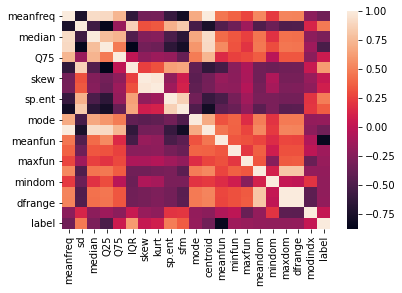

In [281]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 载入数据
data = pd.read_csv('./voice.csv')
print('数据分布：\n', data.describe(include=['O']))
lbe = LabelEncoder()
data['label'] = lbe.fit_transform(data['label'])

# 数据探索
pd.set_option('display.max_columns', None)
print(data.head())
sns.heatmap(data.corr())

In [282]:
data.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


In [283]:
# 去掉高相关性（corr>0.999）的特征
data.drop(columns=['meanfreq','maxdom'], inplace=True)

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# 切分数据集
X = data.drop(columns=['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=888)

# 由于样本正负样本分布均匀，故暂不考虑用于均衡样本的参数
param = {'booster':'gbtree',
         'objective' : 'binary:logistic', #任务目标
         'gamma': 0.2, #达到分裂的最小损失下降值
         'eval_metric' : 'auc', #评估指标
         'eta' : 0.1, #学习率
         'max_depth' : 10, #树最大深度
         'colsample_bytree':0.8, #设置在每次迭代中使用特征的比例
         'subsample': 0.9, #样本采样比例
         'min_child_weight': 3, #分裂所需的子节点最小权重和
         'alpha': 0.5, #L1正则
         'lambda': 0, #L2正则
         'seed': 888,
        }       
train_data = xgb.DMatrix(X_train, y_train)
test_data = xgb.DMatrix(X_test, y_test)
model = xgb.train(param, train_data, 
                  evals=[(train_data, 'train'),(test_data, 'valid')], 
                  num_boost_round=1000, 
                  early_stopping_rounds=25, 
                  verbose_eval=25 #每25轮打印一次
                 )
y_pred = model.predict(test_data)
y_pred = [1 if x>=0.5 else 0 for x in y_pred]
print('XGBoost 预测结果：', y_pred)
print('XGBoost auc:', accuracy_score(y_pred, y_test))

[0]	train-auc:0.98730	valid-auc:0.97057
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[25]	train-auc:0.99961	valid-auc:0.99786
[50]	train-auc:0.99986	valid-auc:0.99823
[75]	train-auc:0.99997	valid-auc:0.99830
Stopping. Best iteration:
[60]	train-auc:0.99992	valid-auc:0.99843

XGBoost 预测结果： [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,